<a href="https://colab.research.google.com/github/DhruvRajSingh-Coder/LetsUpgrade-AI-ML/blob/master/Day_21_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###___LOGISTIC REGRESSION MODELS:___

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
Data=pd.read_csv("https://raw.githubusercontent.com/LetsUpgrade/AI-ML-July-2020/master/Day-7/Assignment/general_data.csv")
Data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
Data=Data.drop(columns=['EmployeeID','EmployeeCount','Over18','StandardHours'])
Data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [ ]:
Data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,4410.0,0.793878,0.851883,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,4401.0,11.279936,7.782222,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0


In [ ]:
Data=Data.fillna(2)

In [ ]:
Data.isna().sum().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data.Attrition=le.fit_transform(Data.Attrition)
Data.BusinessTravel=le.fit_transform(Data.BusinessTravel)
Data.Department=le.fit_transform(Data.Department)
Data.EducationField=le.fit_transform(Data.EducationField)
Data.Gender=le.fit_transform(Data.Gender)
Data.JobRole=le.fit_transform(Data.JobRole)
Data.MaritalStatus=le.fit_transform(Data.MaritalStatus)
Data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [ ]:
Y=Data.Attrition
X=Data.drop(['Attrition'],axis=1)
X1=sm.add_constant(X)
Logistic=sm.Logit(Y,X1)
result=Logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.392984
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Thu, 24 Sep 2020   Pseudo R-squ.:                  0.1103
Time:                        12:15:51   Log-Likelihood:                -1733.1
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 2.951e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0770      0.414      0.186      0.852      -0.734       0.888
Age                        -0.0310      0.007     -4.548      0.000      -0.044      -0.018
BusinessTravel             -0.0176      0.065     -0.268      0.789      -0.146       0.111
Department                 -0.2414      0.081     -2.970      0.003      -0.401      -0.082
DistanceFromHome           -0.0013      0.005     -0.243      0.808      -0.012       0.009
Education                  -0.0630      0.043     -1.479      0.139      -0.147       0.020
EducationField             -0.0962      0.033     -2.884      0.004      -0.162      -0.031
Gender                      0.0863      0.090      0.964      0.335      -0.089       0.262
JobLevel                   -0.0234      0.040     -0.592      0.554      -0.101       0.054
JobRole                     0.0377      0.018      2.106      0.035       0.003       0.073
MaritalStatus               0.5892      0.063      9.328      0.000       0.465       0.713
MonthlyIncome           -1.875e-06   9.56e-07     -1.962      0.050   -3.75e-06   -1.74e-09
NumCompaniesWorked          0.1160      0.018      6.328      0.000       0.080       0.152
PercentSalaryHike           0.0117      0.012      0.994      0.320      -0.011       0.035
StockOptionLevel           -0.0641      0.052     -1.240      0.215      -0.165       0.037
TotalWorkingYears          -0.0573      0.012     -4.864      0.000      -0.080      -0.034
TrainingTimesLastYear      -0.1468      0.035     -4.173      0.000      -0.216      -0.078
YearsAtCompany              0.0116      0.018      0.636      0.525      -0.024       0.047
YearsSinceLastPromotion     0.1324      0.020      6.468      0.000       0.092       0.173
YearsWithCurrManager       -0.1392      0.022     -6.292      0.000      -0.183      -0.096
===========================================================================================
"""

 ___INFERENCE:___
 
 *  The most significant variables affecting attrition of an employee are:   
1.Age   
2.MaritalStatus   
3.NumCompaniesWorked
4.TotalWorkingYears
5.TrainingTimesLastYear
6.YearsSinceLastPromotion
7.YearsWithCurrManager
 
 *The following variables affect significantly the attrition of an employee:   
1.Department  
2.EducationField    
3.JobRole  
4.MonthlyIncome

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/Bank_Personal_Loan_Modelling.xlsx"
Data1=pd.read_excel(path, sheet_name=1)
Data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
Data1.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
Data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
Data1=Data1.drop(['ID','ZIP Code'],axis=1)
Data1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
B=pd.DataFrame(Data1['Personal Loan'])
A=Data1.drop(['Personal Loan'],axis=1)
A1=sm.add_constant(A)
Logistic=sm.Logit(B,A1)
result=Logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Thu, 24 Sep 2020   Pseudo R-squ.:                  0.5938
Time:                        12:17:15   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

___INFERENCE:___
 * The most signicant variables affecting to obtain a personal loan are:   
1.Income   
2.Family    
3.Education    
4.CD Account   
5.Online   
6.CreditCard
 
 * The following variables affect significantly to obtain a personal loan:  
1.CCAvg   
2.Securities Account

###___LINEAR REGRESSION MODELS:___

In [ ]:
path="/content/drive/My Drive/Colab Notebooks/Linear Regression.xlsx"
Data2=pd.read_excel(path)
Data2.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


___Simple Linear Regression models:___

__* price vs sqft_living:__

In [ ]:
x=Data2.drop(['price','bedrooms','bathrooms','floors'],axis=1)
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [ ]:
y=Data2.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
float(lin_reg.coef_)

276.9063982892851

In [ ]:
float(lin_reg.intercept_)

-37174.22453520738

In [ ]:
ypred=lin_reg.predict(x_test)
ypred

array([[ 502793.2521289 ],
       [ 317265.96527508],
       [ 311727.83730929],
       ...,
       [1499656.28597033],
       [ 638477.38729065],
       [ 439104.78052236]])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error((y_test),(ypred)))
r_square=r2_score(y_test,ypred)
print("The RMSE value is :",RMSE)
print("The r_square value is :",r_square)

The RMSE value is : 263815.92396501946
The r_square value is : 0.5066024261739858


<function matplotlib.pyplot.show>

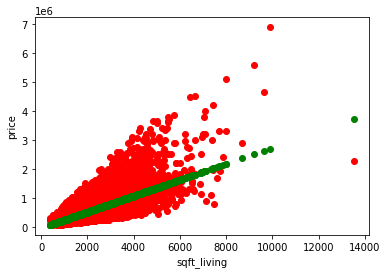

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.scatter(x_train,lin_reg.predict(x_train),color='green')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show

In [ ]:
unseen_pred=lin_reg.predict(np.array([[1108]]))
float(unseen_pred)

269638.06476932054

__* price vs bedrooms:__

In [ ]:
x1=Data2.drop(['price','sqft_living','bathrooms','floors'],axis=1)
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [ ]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [ ]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=12)
lin_reg1=LinearRegression()
lin_reg1.fit(x1_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
 float(lin_reg1.coef_)

117364.90193699891

In [ ]:
 float(lin_reg1.intercept_)

142308.09309673595

In [ ]:
y1pred=lin_reg1.predict(x1_test)
y1pred

array([[729132.60278173],
       [494402.79890773],
       [494402.79890773],
       ...,
       [611767.70084473],
       [611767.70084473],
       [611767.70084473]])

In [ ]:
RMSE1=np.sqrt(mean_squared_error((y_test),(y1pred)))
r_square1=r2_score(y_test,y1pred)
print("The RMSE value is :",RMSE1)
print("The r_square value is :",r_square1)

The RMSE value is : 355641.29628754745
The r_square value is : 0.10335740420924378


<function matplotlib.pyplot.show>

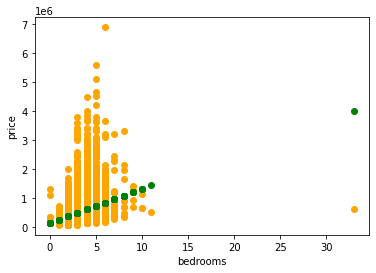

In [ ]:
plt.scatter(x1_train,y_train,color='orange')
plt.scatter(x1_train,lin_reg1.predict(x1_train),color='green')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show

In [ ]:
unseen_pred1=lin_reg1.predict(np.array([[6]]))
float(unseen_pred1)

846497.5047187293

__* price vs bathrooms:__

In [ ]:
x2=Data2.drop(['price','sqft_living','bedrooms','floors'],axis=1)
x2.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [ ]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [ ]:
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.25,random_state=12)
lin_reg2=LinearRegression()
lin_reg2.fit(x2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
float(lin_reg2.coef_)

247819.37090042146

In [ ]:
float(lin_reg2.intercept_)

13900.635218356038

In [ ]:
y2pred=lin_reg2.predict(x2_test)
y2pred

array([[ 385629.69156899],
       [ 385629.69156899],
       [ 447584.53429409],
       ...,
       [1129087.80427025],
       [ 633449.06246941],
       [ 509539.3770192 ]])

In [ ]:
RMSE2=np.sqrt(mean_squared_error((y_test),(y2pred)))
r_square2=r2_score(y_test,y2pred)
print("The RMSE value is :",RMSE2)
print("The r_square value is :",r_square2)

The RMSE value is : 321145.0345894757
The r_square value is : 0.2688652591101529


<function matplotlib.pyplot.show>

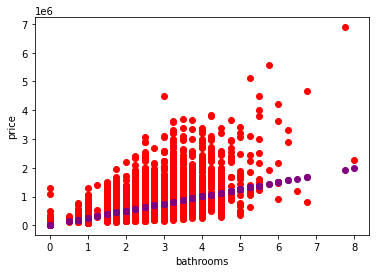

In [ ]:
plt.scatter(x2_train,y_train,color='red')
plt.scatter(x2_train,lin_reg2.predict(x2_train),color='purple')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show

In [ ]:
unseen_pred2=lin_reg2.predict(np.array([[1]]))
float(unseen_pred2)

261720.0061187775

__* price vs floors__

In [ ]:
x3=Data2.drop(['price','sqft_living','bedrooms','bathrooms'],axis=1)
x3.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [ ]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [ ]:
x3_train,x3_test,y_train,y_test=train_test_split(x3,y,test_size=0.25,random_state=12)
lin_reg3=LinearRegression()
lin_reg3.fit(x3_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
float(lin_reg3.coef_)

170170.9424495077

In [ ]:
float(lin_reg3.intercept_)

283969.11532733054

In [ ]:
y3pred=lin_reg3.predict(x3_test)
y3pred

array([[454140.05777684],
       [539225.52900159],
       [454140.05777684],
       ...,
       [624311.00022635],
       [454140.05777684],
       [454140.05777684]])

In [ ]:
RMSE3=np.sqrt(mean_squared_error((y_test),(y3pred)))
r_square3=r2_score(y_test,y3pred)
print("The RMSE value is :",RMSE3)
print("The r_square value is :",r_square3)

The RMSE value is : 362108.6420053775
The r_square value is : 0.0704499535751747


<function matplotlib.pyplot.show>

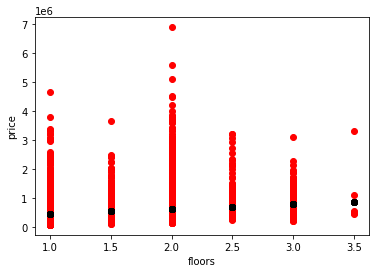

In [ ]:
plt.scatter(x3_train,y_train,color='red')
plt.scatter(x3_train,lin_reg3.predict(x3_train),color='black')
plt.xlabel('floors')
plt.ylabel('price')
plt.show

In [ ]:
unseen_pred3=lin_reg3.predict(np.array([[1]]))
float(unseen_pred3)

454140.05777683825

___Multiple Linear Regression model:___

In [ ]:
X=Data2.iloc[:,1:]
X.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [ ]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=6)
mul_reg=LinearRegression()
mul_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mul_reg.coef_

array([[   313.49522715, -61980.30226047,   1259.23212667,
          4311.22310721]])

In [ ]:
float(mul_reg.intercept_)

88074.38594042737

In [ ]:
Ypred=mul_reg.predict(X_test)
Ypred

array([[725173.43542186],
       [568039.86776404],
       [416510.62647354],
       ...,
       [183579.73428633],
       [666292.55085403],
       [380102.38667395]])

In [ ]:
RMSE4=np.sqrt(mean_squared_error((y_test),(Ypred)))
r_square4=r2_score(y_test,Ypred)
print("The RMSE value is :",RMSE4)
print("The r_square value is :",r_square4)

The RMSE value is : 266623.216265419
The r_square value is : 0.5051999094143171


In [ ]:
X=sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()
results.params

const          74669.676523
sqft_living      309.393228
bedrooms      -57847.963686
bathrooms       7853.523483
floors           200.494349
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5554.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:09:33   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         6.000e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.467e+04   7679.122      9.724      0.000    5.96e+04    8.97e+04
sqft_living   309.3932      3.087    100.228      0.000     303.343     315.444
bedrooms    -5.785e+04   2347.323    -24.644      0.000   -6.24e+04   -5.32e+04
bathrooms    7853.5235   3814.223      2.059      0.040     377.365    1.53e+04
floors        200.4943   3775.505      0.053      0.958   -7199.774    7600.763
==============================================================================
Omnibus:                    14450.413   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494760.938
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.790   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
unseen_pred4=mul_reg.predict(np.array([[750,3,2,1]]))
float(unseen_pred4)

144084.58688328258

 ___INFERENCE:___
 * The most significant variables which affect the price are:
1.sqft_living   
2.Number of bedrooms
 * The significant variable which affect the price is Number of bathrooms
 * Number of floors has the least significant affect on price.